<a href="https://colab.research.google.com/github/JorgePeje/test-python-utec/blob/main/Programacion-Python-Utec/modulo2_estructurasdatossecuenciales/SESION19%20y%2020/%5B7%5D_Actividad_41_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 41: Caso Trackus

## [0] Librerías necesarias para el proyecto

In [13]:
# Conectamos Google Drive con Google Colab
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [14]:
# Librerías necesarias para el desarrollo del proyecto
import pandas as pd
import numpy as np
#from datetime import date

## [1] Entendimiento de los datos

Etapa inicial en un proyecto de Ciencia de Datos, nos permite explorar las características de los datos a ser modelados.

In [15]:
# Lectura de los datos (formato parquet)
ruta = "/gdrive/My Drive/Datos Python UTEC/"
dataset = "dataset_test.parquet"

In [16]:
ruta+dataset

'/gdrive/My Drive/Datos Python UTEC/dataset_test.parquet'

In [17]:
data = pd.read_parquet(ruta+dataset, engine='pyarrow')

In [18]:
# Tipo de dato
type(data)

pandas.core.frame.DataFrame

In [19]:
# Dimensionalidad de los datos a nivel de número de filas y columnas
data.shape

(116211465, 5)

In [20]:
# Inspección de los datos, cinco registros iniciales
data.head(5)

,Date,Account_id,Product_id,Category,Quantity
0,2022-01-03,33236916,8350,Gaseosas,1
1,2022-01-03,33237477,15354,Maltas,5
2,2022-01-03,33229164,14016,Cervezas,25
3,2022-01-03,33229164,22270,Cervezas,2
4,2022-01-03,33229164,23760,Cervezas,21


In [21]:
# Obtener las estadísticas de algunas variables (numéricas)
data[['Quantity']].describe()

,Quantity
count,1.162115e+08
mean,1.438517e+01
std,9.367268e+01
min,0.000000e+00
25%,1.000000e+00
50%,2.000000e+00
75%,6.000000e+00
max,1.187600e+04


In [1]:

from google.colab import files

# Subir archivo desde tu máquina local
uploaded = files.upload()

Saving describe.jpg to describe.jpg


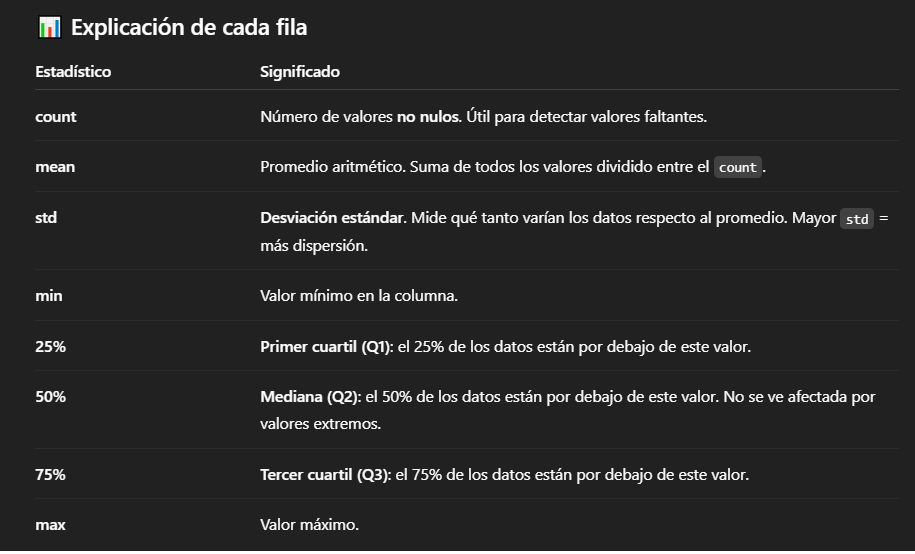

In [2]:
from IPython.display import Image, display

# Mostrar la imagen en Colab
display(Image(filename='describe.jpg'))

In [ ]:
# Obtener las estadísticas de algunas variables (cualitativas)
data[['Category']].describe()

,Category
count,116211465
unique,7
top,Gaseosas
freq,52033722


In [22]:
# Llamar a la variable "Account_id"
data['Account_id']

,Account_id
0,33236916
1,33237477
2,33229164
3,33229164
4,33229164
...,...
116211460,36889479
116211461,36889479
116211462,36889479
116211463,36889479


In [23]:
data.Account_id

,Account_id
0,33236916
1,33237477
2,33229164
3,33229164
4,33229164
...,...
116211460,36889479
116211461,36889479
116211462,36889479
116211463,36889479


In [24]:
# Cantidad de clientes únicos
data.Account_id.nunique()

12618

In [25]:
# Cantidad de productos únicos
data.Product_id.nunique()

182

In [26]:
# Cantidad de categorías de productos únicos
data.Category.nunique()

7

In [27]:
# Evaluamos a las categorías
data.groupby(['Category'])['Account_id'].count()

,Account_id
Category,
Agua,1182090
Cervezas,37279999
Gaseosas,52033722
Jugos Mp,3320394
Lacteos,1649264
Licor Mp,578113
Maltas,20167883


In [28]:
# Obtener una lista con las categorías distintas de la variable
data.Category.unique()

array(['Gaseosas', 'Maltas', 'Cervezas', 'Agua', 'Jugos Mp', 'Licor Mp',
       'Lacteos'], dtype=object)

Saving unique.png to unique.png


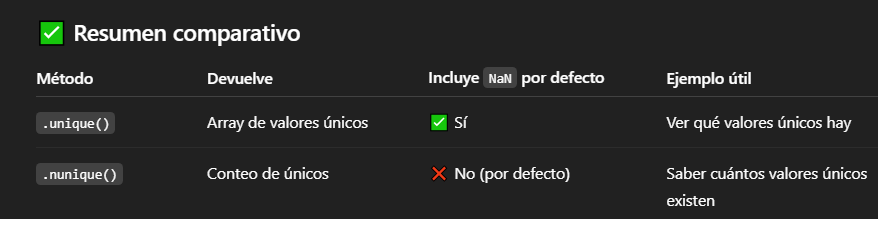

In [30]:
uploaded = files.upload()
display(Image(filename='unique.png'))

In [ ]:
# Inspeccionamos la compra del cliente (código 33236916)
data[data['Account_id']==33236916]

,Date,Account_id,Product_id,Category,Quantity
0,2022-01-03,33236916,8350,Gaseosas,1
2083,2022-01-03,33236916,8350,Gaseosas,1
3427,2022-01-03,33236916,8350,Gaseosas,1
5825,2022-01-03,33236916,8350,Gaseosas,1
7904,2022-01-03,33236916,8350,Gaseosas,1
...,...,...,...,...,...
116203108,2022-07-30,33236916,8228,Gaseosas,2
116203109,2022-07-30,33236916,34366,Cervezas,10
116205567,2022-07-30,33236916,8222,Gaseosas,3
116205568,2022-07-30,33236916,8228,Gaseosas,2


In [31]:
data.columns

Index(['Date', 'Account_id', 'Product_id', 'Category', 'Quantity'], dtype='object')

In [32]:
# Creamos una lista de campos que serán analizados
vars = data.columns.to_list()
vars

['Date', 'Account_id', 'Product_id', 'Category', 'Quantity']

In [33]:
# Agrupamos la data (está expresada a nivel transaccional) a nivel cliente - producto - día
data = data.groupby(vars[:-1])[vars[-1]].sum().reset_index()

In [34]:
# Inspeccionamos la compra del cliente (código 33236916)
data[data['Account_id']==33236916]

,Date,Account_id,Product_id,Category,Quantity
659,2022-01-03,33236916,8350,Gaseosas,89
35158,2022-01-08,33236916,8326,Gaseosas,89
35159,2022-01-08,33236916,9850,Gaseosas,178
35160,2022-01-08,33236916,9852,Gaseosas,178
35161,2022-01-08,33236916,12620,Gaseosas,267
...,...,...,...,...,...
1271391,2022-07-27,33236916,14014,Cervezas,5400
1271392,2022-07-27,33236916,34620,Jugos Mp,54
1288590,2022-07-30,33236916,8222,Gaseosas,153
1288591,2022-07-30,33236916,8228,Gaseosas,102


In [ ]:
# Inspeccionamos la nueva dimensionalidad de los datos
data.shape

(1292772, 5)

In [ ]:
# Inspeccionamos el tipo del dato
data.dtypes

In [ ]:
# Cambiamos el campo Date de objeto a fecha
data['Date'] = data['Date'].astype('datetime64[ns]')

In [ ]:
# Calculamos la fecha mínima y máxima de transacción
print("Fecha Mínima: ", data.Date.min())
print("Fecha Máxima: ", data.Date.max())
print("*"*100)

In [ ]:
# Generamos el resumen de la cantidad de clientes a nivel día
res_date = data.groupby(['Date'])['Account_id'].count().reset_index()

In [ ]:
res_date.head(10)

In [ ]:
# Estadísticas del resumen de la cantidad de clientes a nivel día
res_date['Account_id'].describe().T

In [ ]:
# Calculamos las fechas que presentan un comportamiento atípico a nivel de clientes
p75 = np.quantile(res_date['Account_id'],0.75)
p25 = np.quantile(res_date['Account_id'],0.25)
ric = p75 - p25
l_inf = p25 - (1.5*ric)
l_sup = p75 - (1.5*ric)

In [ ]:
# Calculamos la fecha mínima y máxima de transacción
print("Umbral mínimo de clientes por día: ", l_inf)
print("Umbral máximo de clientes por día ", l_sup)
print("*"*100)

In [ ]:
# Extraemos los campos Year y Month desde el campo Date
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

In [ ]:
# Inspeccionamos los primeros cinco registros
data.head(5)

In [ ]:
# Guardamos los datos agrupados a nivel cliente - producto - día
ruta = "/gdrive/My Drive/[UTEC_2025]/[Programa_Python_Mayo]/ALUMNOS/out/"
dataset = "data_agrupada.csv"
data.to_csv(ruta+dataset,header='True',index_label='False')

## [2] Preparación de los datos

Etapa en la que limpiamos los datos para simplificar la complejidad natural de la búsqueda de patrones por parte de los algoritmos.

In [ ]:
# Calculamos los rangos intercuartílicos para la identificación de outliers a nivel de cantidad de compras

q3 = np.quantile(data['Quantity'],0.75)
q1 = np.quantile(data['Quantity'],0.25)
ric = q3 - q1
lim_sup = q3 + (1.5*ric)
lim_inf = q1 - (1.5*ric)

In [ ]:
# Límites según criterio de Boxplot
lim_inf, lim_sup

In [ ]:
# Filtramos los casos que se encuentran contenidos entre los límites
data = data[(data['Quantity']>= lim_inf) & (data['Quantity']<= lim_sup)]

In [ ]:
# Exploramos la nueva dimensionalidad de los datos, no están considerados los valores outliers
data.shape

In [ ]:
# Analizamos la cantidad promedio de productos comprados por día
data.groupby(['Month'])['Quantity'].mean()

In [ ]:
# Analizamos la mediana de la cantidad de productos comprados por día
data.groupby(['Month'])['Quantity'].median()

In [ ]:
# Analizamos la dispersión de la cantidad de productos comprados por día
data.groupby(['Month'])['Quantity'].std()